In [1]:
import sympy 
import numpy as np
import matplotlib.pyplot as plt

## [Polynomial interpolation](https://en.wikipedia.org/wiki/Polynomial_interpolation)



### [Lagrange polynomial](https://en.wikipedia.org/wiki/Lagrange_polynomial)


$L(x):= \sum\limits_{j=0}^k y_jl_j(x), where:$ <br>
$l_j(x):= \prod\limits_{m=0,m!=j}^k \frac{x-x_m}{x_j-x_m}$

In [2]:
#correct implementation: fit using train, generate an equation, then use to evaluate test
def LagrangePolynomial_fit(X,Y):
    x,n = sympy.Symbol('x'),len(X)
    function = 0
    for i in range(n):
        def L(i):
            Lv = 1
            for j in range(n):
                if i!=j:
                    Lv*=(x - X[j])/(X[i]-X[j])
            return Lv
        function+=Y[i]*L(i)
        function = function.simplify()
    return function
def LagrangePolynomial_predict(x,function):
    return function.subs({'x':x})

In [3]:
x=np.array([0.38,0.49,0.99,1.09,1.19,1.40,1.71,1.72,2.04,2.38,2.53], dtype=float)
y=np.array([1.462,1.632,2.691,2.974,3.287,4.055,5.528,5.584,7.690,10.804,12.553], dtype=float)

function = LagrangePolynomial_fit(x,y)

xnew=np.linspace(np.min(x),np.max(x),20)
ynew = [LagrangePolynomial_predict(x,function) for x in xnew]

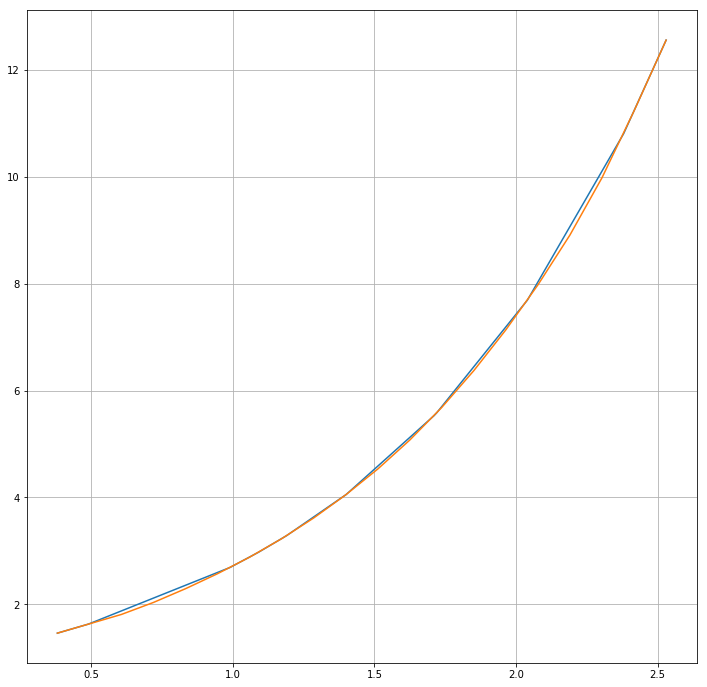

In [9]:
plt.figure(figsize=(12,12))
plt.grid(True)
plt.plot(x,y)
plt.plot(xnew,ynew)